
# Project: movies data analysis

the main purpose of this project is to go through the dataset and do analasis process by using pandas and numpy and matplotlip to visualize the answers of the question


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### this data set includes about 10,500 movies collected from the tmdb database 

### it contains:
#### 10866 rows 
#### 21 coloumns

### there are some questions to be asked :
#### question 1:which movie have the highest and lowest profit?
#### question 2:which movie have the highest and lowest revenue?
#### question 3:which movie have the highest and lowest runtime?
#### question 4:which movie have the highest and lowest budget?
#### question 5: What kinds of properties are associated with movies that have high revenues?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

now i will keep only the relevant data that will be important to ask my questions , so i will clean and transform the data

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [74]:
df.shape


(10866, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## removing the un-used coloumns from the data set [ibmid-homepage-tagline-overview-budget_adj - revenue_adj ]


In [5]:
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords'],axis =1,inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [77]:
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,15,1.5,1966


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [8]:
#fill the nun values with 0
df.fillna(0)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966



### Data Cleaning (removing the un-needed information from the data set 
#### 1- remove the duplicated rows
#### 2- convert the release date into datetime
#### 3- remove the movies with budget and revenue = 0

In [9]:
#find the duplicate rows to remove them
df.duplicated().sum()

1

In [10]:
#remove the duplicates
df.drop_duplicates(inplace=True)
df.shape

(10865, 14)

In [11]:
#converting the release date into datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [12]:
#drop the rows with budget =0
df.drop(df[df['budget'] ==0].index, inplace = True)
df.shape

(5169, 14)

In [13]:
#drop rows with revenue =0
df.drop(df[df['revenue']==0].index , inplace = True)
df.shape

(3854, 14)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which movie have the highest and lowest profit ?)

In [14]:
#to find the profit i will subtract the budget from the revenue
df['Profit'] = df['revenue'] - df['budget']

In [15]:
#i will implement a function to calculate the highest and lowest of anything i want id the dataset
# the (i) in the parameter is the variable i will pass every time my requirement is changing ex: in this question i try to find the profit so i will pass the profit to the paramater
def min_max(i):
    minimum_index = df[i].idxmin()
    #the next variable will hold all the info of the highest... movie
    minimum = pd.DataFrame(df.loc[minimum_index,:])
    
    maximum_index = df[i].idxmax()
    #the next variable will hold all the info of the lowest ... movie
    maximum= pd.DataFrame(df.loc[maximum_index, :])
    
    print("the movie that have the highest " + i + " : ",df['original_title'][maximum_index] )
    print("the movie that have the lowest " + i + " : ",df['original_title'][minimum_index] )
    
    return pd.concat([maximum,minimum],axis=1)

    

In [68]:
min_max('Profit')

the movie that have the highest Profit :  Avatar
the movie that have the lowest Profit :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


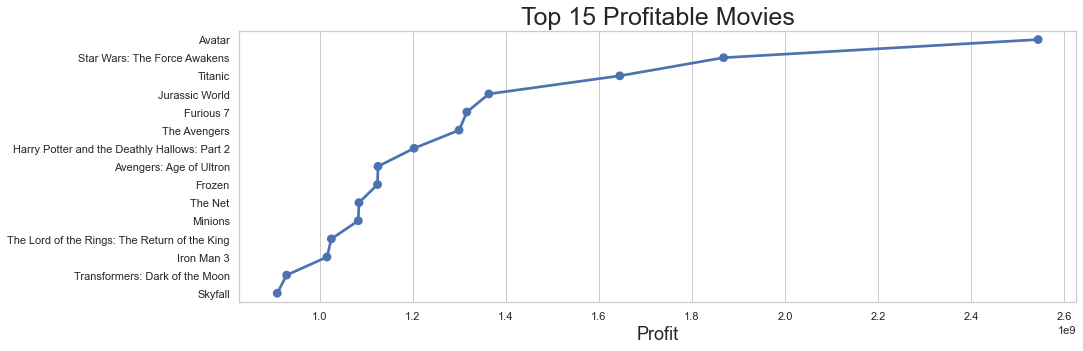

In [21]:
### this plot will show the top 15 movies which have highest profit

# sort the profit coloumn in descending order and store it a new dataframe 
information = pd.DataFrame(df['Profit'].sort_values(ascending=False))
information['original_title']=df['original_title']
data = list(map(str,(information['original_title'])))
x= list(data[:15])
y=list(information['Profit'][:15])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 15 Profitable Movies",fontsize = 25)
ax.set_xlabel("Profit",fontsize = 18)
sns.set_style("whitegrid")

## conclusions
### this visualization  shows the highest 15 profitable movies in the data set which include AVATAR , STAR WARS and TITANIC which are the top three profitable movies

### Research Question 2  (which movie has the highest and lowest revenue?!)

In [88]:
#by using the min-max function 
min_max('revenue')


the movie that have the highest revenue :  Avatar
the movie that have the lowest revenue :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


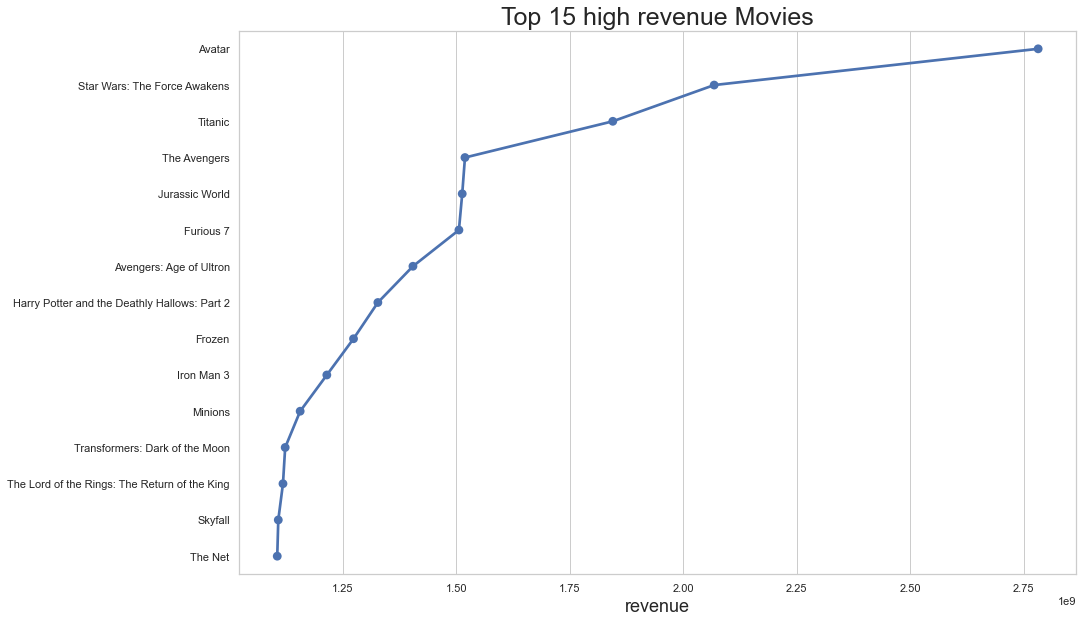

In [32]:
information = pd.DataFrame(df['revenue'].sort_values(ascending=False))
information['original_title']=df['original_title']
data = list(map(str,(information['original_title'])))
x= list(data[:15])
y=list(information['revenue'][:15])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 15 high revenue Movies",fontsize = 25)
ax.set_xlabel("revenue",fontsize = 18)
sns.set_style("whitegrid")

## conclusions
### this visualization shows the Top 15 high revenue Movies which includes AVATAR , STAR WARS and TAITANIC which are the top 3 movies

### Research Question 3  (which movie has the highest and lowest runtime?)

In [26]:
# i filled the nan values with zeroes but its not logi to the duration of the movie to be zero so i have to replace all zeros values with np.nan
df['runtime'] = df['runtime'].replace(0,np.NAN)
min_max('runtime')

the movie that have the highest runtime :  Carlos
the movie that have the lowest runtime :  Kid's Story


,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


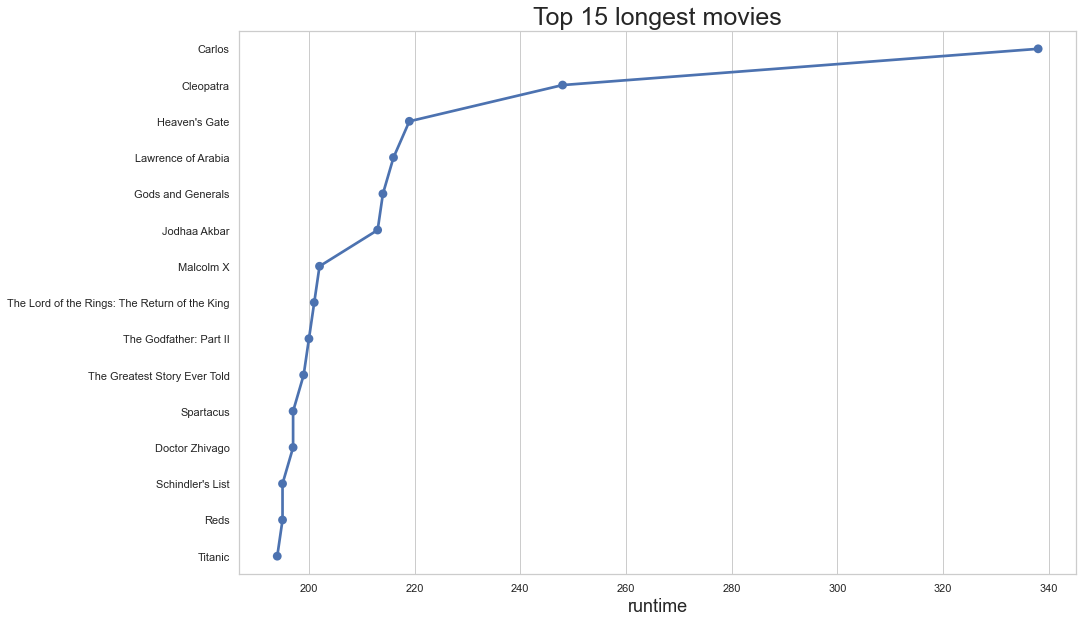

In [33]:
information = pd.DataFrame(df['runtime'].sort_values(ascending=False))
information['original_title']=df['original_title']
data = list(map(str,(information['original_title'])))
x= list(data[:15])
y=list(information['runtime'][:15])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 15 longest movies",fontsize = 25)
ax.set_xlabel("runtime",fontsize = 18)
sns.set_style("whitegrid")

## conclusions
### this visualization shows the longest 15 runtime Movies which includes CARIOS , Cleopatra and Heaven's gate which are the top three movies

### Research Question 4  (which movie has the highest and lowest budget ?)

In [30]:
# fill the zero values with np.NAN 
df['budget'] = df['budget'].replace(0,np.NAN)
min_max('budget')

the movie that have the highest budget :  The Warrior's Way
the movie that have the lowest budget :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


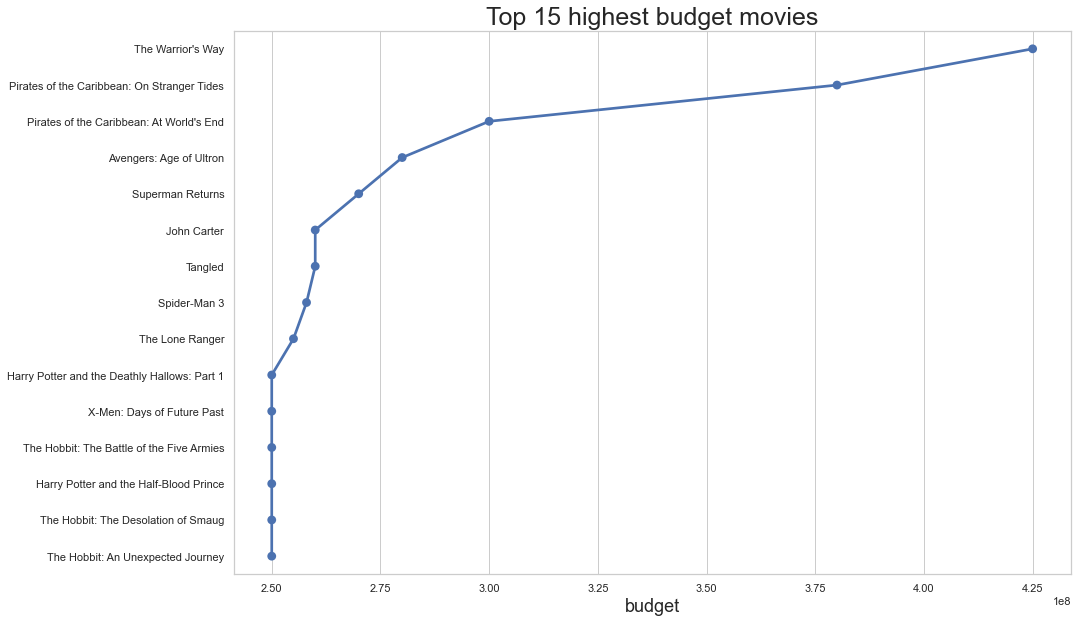

In [34]:
information = pd.DataFrame(df['budget'].sort_values(ascending=False))
information['original_title']=df['original_title']
data = list(map(str,(information['original_title'])))
x= list(data[:15])
y=list(information['budget'][:15])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 15 highest budget movies",fontsize = 25)
ax.set_xlabel("budget",fontsize = 18)
sns.set_style("whitegrid")

## conclusions
### this visualization shows the top 15 highest budget Movies which includes 'THE WOMAN'S WAY' ,'pirates of the caribbean: on stranger tides' and ''pirates of the caribbean: at world's end'  which are the top three movies

### question 5(What Kind Of Properties Are Associated With Movies With High Revenue?)

In [40]:
information = pd.DataFrame(df['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','director','runtime','genres','vote_average','release_year']
for i in data_set:
    information[i] = df[i]
information.head(2)

,revenue,id,popularity,budget,original_title,director,runtime,genres,vote_average,release_year
1386,2781505847,19995,9.432768,237000000,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015


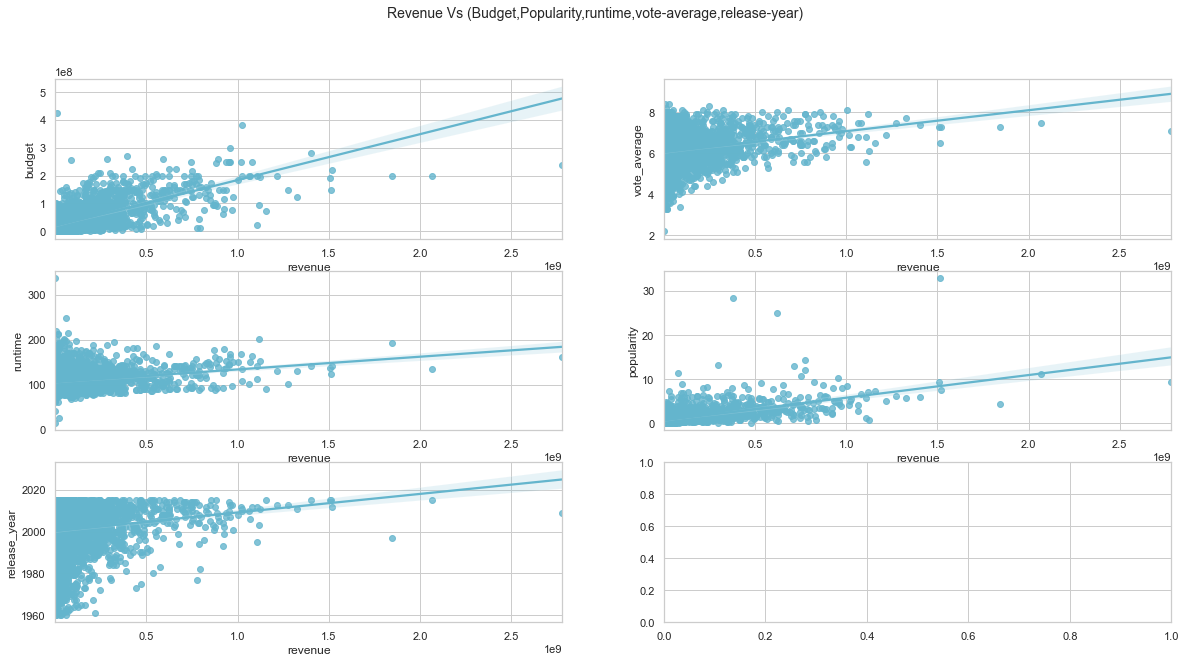

In [69]:
fig,axes = plt.subplots(3,2,figsize = (20,10))
fig.suptitle("Revenue Vs (Budget,Popularity,runtime,vote-average,release-year)",fontsize=14)
sns.regplot(x=df['revenue'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='c',ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['runtime'],color='c',ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='c',ax=axes[1][1])
sns.regplot(x=df['revenue'], y=df['release_year'],color='c',ax=axes[2][0])
sns.set_style("whitegrid")

## conclusions
### this visualization shows the relationship between the revenues of movies and the five mentioned factors 
### and it clarifies that the most effective factor is the budget as The higher the movie's budget, the higher the revenue.



<a id='conclusions'></a>
## Conclusions
<ol>
    <li><b>'Avatar','star wars','titanic' and 'jurassic world'</b> are the most profitable movies</li>
    <li><b>'Avatar ,'star wars','the avengers'</b> have the highest revenue </li>
    <li><b>'cartos' ,'cleopatre','heaves's gate'</b> have the longest runtime duration</li>
<li><b>'the warrior's way','pirates of the caribbean:on stranger tides','pirates of the caribbean:at the world's end' </b>are the highest budget movies </li>
    <li>there is a <b>direct relation</b> between the <b>budget and revenue</b> , as when the movie budget is <b>high</b>, the revenue will <b>increase</b> </li>
</ol>


##  limitations
<ul>
    <li> the data was sufficient to prove my findings</li>
    <li> there were un useful data like the data in the following columns 'budget_adj','revenue_adj','overview','imdb_id','homepage','tagline' </li>
    <li>there were alot of missing and zero data</li>
    <li>there were a duplicate data</li>
    <li>from my perspective, if there were a column for the age rating for each movie, it may be affected the analysis.</li>
</ul>    
